#  <font color='#FFE15D'><b>💎 Week 5: Multiclass Classification</b></font>

## ◀️ **Recap 👀**

<font size=5>✅ **Week 0**: Installation </font>

<font size=5>✅ **Week 1**: Torch as Numpy </font>

<font size=5>✅ **Week 2**: Linear Regression with Torch API </font>

<font size=5>✅ **Week 3**: Linear Regression Autograd </font>

<font size=5>✅ **Week 4**: Binary Classification </font>

In [ ]:
# Load Data
train_set = TensorDataset(X, y)
train_loader = DataLoader(train_set, batch_size=..., shuffle=True)

# Define Model
model = nn.Linear(...)

# Define Loss
loss_fn = nn...

# Define Optimizer
optimizer = optim.SGD(model.parameters(), lr=..., momentum=0.9)

# train Loop
for epoch in range(n_epochs):
  for x_batch, y_batch in train_loader:
    # model
    y_hat = model(x_batch)
    # loss
    loss = loss_fn(y_hat, y_batch)
    # gradient
    loss.backward()
    # update
    optimizer.step()
    optimizer.zero_grad()

## 🟪 **Increasing the output font size in Colab cells**

In [1]:
from IPython.display import HTML
shell = get_ipython()

def adjust_font_size():
  display(HTML('''<style>
    body {
      font-size: 30px;
    }
  '''))

if adjust_font_size not in shell.events.callbacks['pre_execute']:
  shell.events.register('pre_execute', adjust_font_size)

In [2]:
a = 3
a

3

## 🟥 **Imports**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn
from torch.optim import SGD

In [2]:
torch.__version__

'2.1.2'

## 🟥 **Step 1: Data**

In [3]:
from sklearn import datasets

In [4]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
num_samples, num_features = X.shape
num_classes = len(np.unique(y))
num_samples, num_features, num_classes

(150, 4, 3)

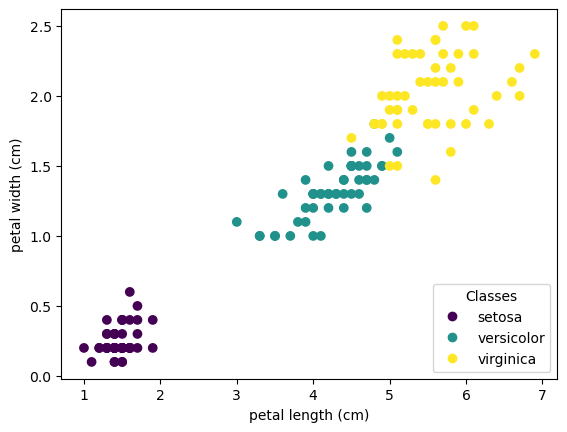

In [5]:
_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 2], iris.data[:, 3], c=iris.target)
ax.set(xlabel=iris.feature_names[2], ylabel=iris.feature_names[3])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=10, stratify=y)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size=0.9, random_state=10, stratify=y_train)
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape, X_test.shape, y_test.shape

((108, 4), (108,), (12, 4), (12,), (30, 4), (30,))

In [7]:
x_scaler = StandardScaler()
X_train = x_scaler.fit_transform(X_train)
X_valid = x_scaler.transform(X_valid)
X_test = x_scaler.transform(X_test)

In [8]:
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.int64)

X_valid = torch.tensor(X_valid, dtype=torch.float32)
y_valid = torch.tensor(y_valid, dtype=torch.int64)

X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.int64)

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape, X_test.shape, y_test.shape

(torch.Size([108, 4]),
 torch.Size([108]),
 torch.Size([12, 4]),
 torch.Size([12]),
 torch.Size([30, 4]),
 torch.Size([30]))

In [9]:
train_set = TensorDataset(X_train, y_train)
valid_set = TensorDataset(X_valid, y_valid)
test_set = TensorDataset(X_test, y_test)

In [10]:
train_loader = DataLoader(train_set, batch_size=10, shuffle=True)
valid_loader = DataLoader(valid_set, batch_size=10)
test_loader = DataLoader(test_set, batch_size=10)

In [11]:
x_batch, y_batch = next(iter(train_loader))
x_batch.shape, y_batch.shape

(torch.Size([10, 4]), torch.Size([10]))

In [12]:
y_batch

tensor([0, 2, 1, 0, 1, 0, 2, 0, 0, 1])

## 🟥 **Step 2: Model**

### 🟧 **`nn.Linear()`**

In [31]:
model = nn.Linear(num_features, num_classes)
model

Linear(in_features=4, out_features=3, bias=True)

In [32]:
y_hat = model(x_batch)
y_hat.shape

torch.Size([2, 3])

In [33]:
model.weight, model.bias

(Parameter containing:
 tensor([[ 0.2018, -0.1237, -0.3600, -0.1272],
         [-0.4454, -0.3212, -0.1305, -0.0650],
         [-0.1772,  0.2925, -0.3651,  0.4986]], requires_grad=True),
 Parameter containing:
 tensor([-0.3004, -0.2274,  0.1436], requires_grad=True))

### 🟧 **Softmax**

In [34]:
a = torch.tensor(
    [[5, 2.5, 0.5],
     [5, 2.5, 0.5]]
     )
torch.softmax(a, dim=1)

tensor([[0.9148, 0.0751, 0.0102],
        [0.9148, 0.0751, 0.0102]])

In [35]:
torch.softmax(y_hat, dim=1)

tensor([[0.3596, 0.4144, 0.2260],
        [0.2467, 0.3676, 0.3857]], grad_fn=<SoftmaxBackward0>)

### 🟧 **Define Multiclass Model**

In [36]:
model = nn.Linear(num_features, num_classes)
y_hat = torch.softmax(model(x_batch), dim=1)
y_hat

tensor([[0.5481, 0.1656, 0.2863],
        [0.1168, 0.2039, 0.6793]], grad_fn=<SoftmaxBackward0>)

In [37]:
model = nn.Sequential(
    nn.Linear(num_features, num_classes),
    nn.Softmax(dim=1)
    )
model

Sequential(
  (0): Linear(in_features=4, out_features=3, bias=True)
  (1): Softmax(dim=1)
)

In [38]:
model = nn.Linear(num_features, num_classes)
model

Linear(in_features=4, out_features=3, bias=True)

## 🟥 **Step 3: Loss**

In [42]:
loss_fn = nn.CrossEntropyLoss()
loss_fn

CrossEntropyLoss()

In [43]:
y_batch

tensor([1, 0])

In [44]:
loss_fn(y_hat, y_batch)

tensor(1.3132, grad_fn=<NllLossBackward0>)

## 🟥 **Step 4: Optimizer**

In [45]:
optimizer = SGD(model.parameters(), lr=0.1, momentum=0.9)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.1
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)

## 🟥 **Step 5: Train**

In [46]:
y_hat.argmax(dim=1), y_batch

(tensor([0, 2]), tensor([1, 0]))

In [47]:
n_epochs = 10
loss_train_hist, loss_valid_hist = [], []
acc_train_hist, acc_valid_hist = [], []
best_loss_valid = 10000

In [48]:
for epoch in range(n_epochs):

  mean_loss_train, mean_loss_valid = 0, 0
  mean_acc_train, mean_acc_valid = 0, 0

  for x_batch, y_batch in train_loader:

    # model
    y_hat = model(x_batch)

    # loss
    loss = loss_fn(y_hat, y_batch)

    # gradient
    loss.backward()

    # update
    optimizer.step()
    optimizer.zero_grad()

    mean_loss_train += loss.item() * len(x_batch)
    mean_acc_train += torch.sum(y_hat.argmax(dim=1) == y_batch).item()

  mean_loss_train = mean_loss_train / len(train_set)
  mean_acc_train = mean_acc_train / len(train_set)

  loss_train_hist.append(mean_loss_train)
  acc_train_hist.append(mean_acc_train)


  with torch.no_grad():
    for x_batch, y_batch in valid_loader:
      y_hat = model(x_batch)
      loss = loss_fn(y_hat, y_batch)
      mean_loss_valid += loss.item() * len(x_batch)
      mean_acc_valid += torch.sum(y_hat.argmax(dim=1) == y_batch).item()

    mean_loss_valid = mean_loss_valid / len(valid_set)
    mean_acc_valid = mean_acc_valid / len(valid_set)

    loss_valid_hist.append(mean_loss_valid)
    acc_valid_hist.append(mean_acc_valid)

  print(
  f"Epoch: {epoch}   "
  f"LossTrain: {mean_loss_train:.2}   "
  f"AccTrain: {mean_acc_train:.2}   "
  f"LossValid: {mean_loss_valid:.2}   "
  f"AccValid: {mean_acc_valid:.2}"
  )

  if mean_loss_valid < best_loss_valid:
    torch.save(model, "./out/week-5-best-model.pt")
    best_loss_valid = mean_loss_valid
    print("Model Saved!")
    print()

Epoch: 0   LossTrain: 0.88   AccTrain: 0.56   LossValid: 0.27   AccValid: 0.92
Model Saved!

Epoch: 1   LossTrain: 0.39   AccTrain: 0.82   LossValid: 0.19   AccValid: 0.92
Model Saved!

Epoch: 2   LossTrain: 0.25   AccTrain: 0.9   LossValid: 0.16   AccValid: 0.92
Model Saved!

Epoch: 3   LossTrain: 0.19   AccTrain: 0.93   LossValid: 0.13   AccValid: 1.0
Model Saved!

Epoch: 4   LossTrain: 0.16   AccTrain: 0.95   LossValid: 0.15   AccValid: 1.0
Epoch: 5   LossTrain: 0.14   AccTrain: 0.96   LossValid: 0.15   AccValid: 0.92
Epoch: 6   LossTrain: 0.13   AccTrain: 0.97   LossValid: 0.1   AccValid: 1.0
Model Saved!

Epoch: 7   LossTrain: 0.12   AccTrain: 0.96   LossValid: 0.12   AccValid: 1.0
Epoch: 8   LossTrain: 0.12   AccTrain: 0.96   LossValid: 0.1   AccValid: 1.0
Model Saved!

Epoch: 9   LossTrain: 0.11   AccTrain: 0.96   LossValid: 0.091   AccValid: 1.0
Model Saved!



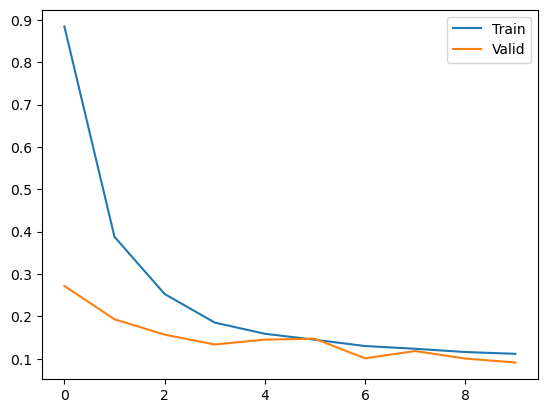

In [49]:
plt.plot(torch.arange(n_epochs), loss_train_hist)
plt.plot(torch.arange(n_epochs), loss_valid_hist)
plt.legend(["Train", "Valid"]);

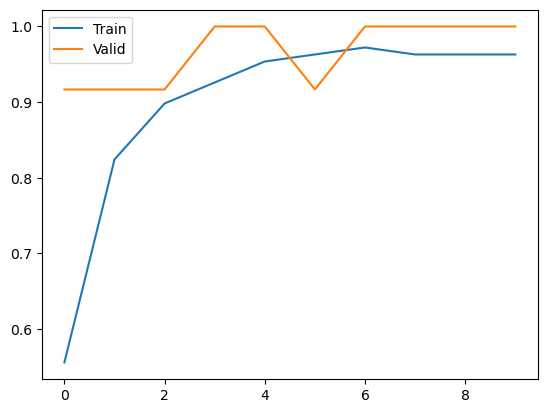

In [50]:
plt.plot(torch.arange(n_epochs), acc_train_hist)
plt.plot(torch.arange(n_epochs), acc_valid_hist)
plt.legend(["Train", "Valid"]);

## 🟥 **Test**

In [51]:
model = torch.load("./out/week-5-best-model.pt")

In [52]:
mean_acc_test = 0

with torch.no_grad():
  for x_batch, y_batch in test_loader:
    y_hat = model(x_batch)
    mean_acc_test += torch.sum(y_hat.argmax(dim=1) == y_batch).item()
  mean_acc_test = mean_acc_test / len(test_set)

mean_acc_test

1.0

## 🟪 **Exercise: Fetal Health Classification**

https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification/code?datasetId=916586

**Classify fetal health in order to prevent child and maternal mortality.**

Reduction of child mortality is reflected in several of the United Nations' Sustainable Development Goals and is a key indicator of human progress.
The UN expects that by 2030, countries end preventable deaths of newborns and children under 5 years of age, with all countries aiming to reduce under‑5 mortality to at least as low as 25 per 1,000 live births.

Parallel to notion of child mortality is of course maternal mortality, which accounts for **295 000 deaths** during and following pregnancy and childbirth (as of 2017). The vast majority of these deaths (**94%**) occurred in low-resource settings, and most **could have been prevented**.

In light of what was mentioned above, **Cardiotocograms (CTGs)** are a simple and cost accessible option to assess fetal health, allowing healthcare professionals to take action in order to prevent child and maternal mortality. The equipment itself works by sending ultrasound pulses and reading its response, thus shedding light on fetal heart rate (FHR), fetal movements, uterine contractions and more.

This dataset contains **2126** records of features extracted from Cardiotocogram exams, which were then classified by three expert obstetritians into **3 classes**:

* Normal
* Suspect
* Pathological